Import Libraries and Database

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

Look at Data

In [13]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [14]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [27]:
df.describe(include=['O'])

,Gender,Location,Subscription_Type,Payment_Method,Favorite_Genre,Devices_Used,Reason_for_Churn
count,1000,1000,1000,1000,1000,1000,246
unique,3,5,3,3,5,4,4
top,Other,West,Standard,Credit Card,Drama,Mobile,Price increase
freq,336,216,530,613,212,408,68


In [28]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

Looks like all data there as all heading have 1000 count 
does not look like any of the data has issues or outliers EXPLSIN WHY 

<Axes: xlabel='Churned', ylabel='Count'>

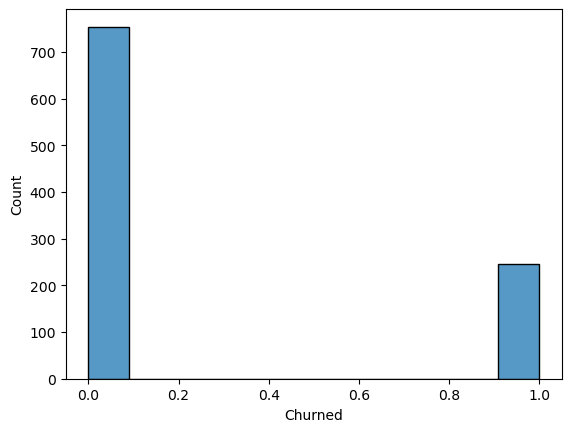

In [16]:
#look at if it is 25% churn rate
sns.histplot(df['Churned'])

#figure out out to show count of churn and non chun churn is represented with 1 not churned represented with zero

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

# 754 missing values are people that did not churn (1000-246) shown in graph

In [ ]:
# indeger correct object correct 
# convert dATE TO DATE TIME OBJECT FOR EASIER LOOK

In [23]:
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [25]:
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [39]:
# make new colum for tenure
df['tenure']= df['Date_of_Churn'] - df['Subscription_Start_Date']

In [40]:
df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,tenure
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,246,246
mean,500.500000,44.385000,2021-09-18 17:08:01.662466560,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,195 days 08:35:07.317073170
min,1.000000,18.000000,2019-05-10 01:53:37.659073,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,30 days 00:00:00
25%,250.750000,31.750000,2020-05-15 19:53:37.664891136,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,115 days 00:00:00
50%,500.500000,45.000000,2021-08-21 01:53:37.662536448,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,201 days 00:00:00
75%,750.250000,57.000000,2023-01-09 07:53:37.664328192,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,276 days 18:00:00
max,1000.000000,70.000000,2024-05-06 01:53:37.662112,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,364 days 00:00:00
std,288.819436,15.321669,NaN,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894,NaN,95 days 11:36:35.306355338


In [46]:
df.Gender.value_counts()

Gender
Other     336
Male      334
Female    330
Name: count, dtype: int64

In [48]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,tenure
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaT
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaT
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaT
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaT
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaT


In [56]:
#Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()['Churned'].sort_values(ascending=False)
print(correlation)

Churned                   1.000000
Content_ID                0.024253
User_ID                   0.009620
Average_Session_Length    0.008055
Monthly_Payment          -0.013059
Age                      -0.045139
Monthly_Hours_Watched    -0.060233
Rating_Given             -0.175378
Name: Churned, dtype: float64


<Axes: >

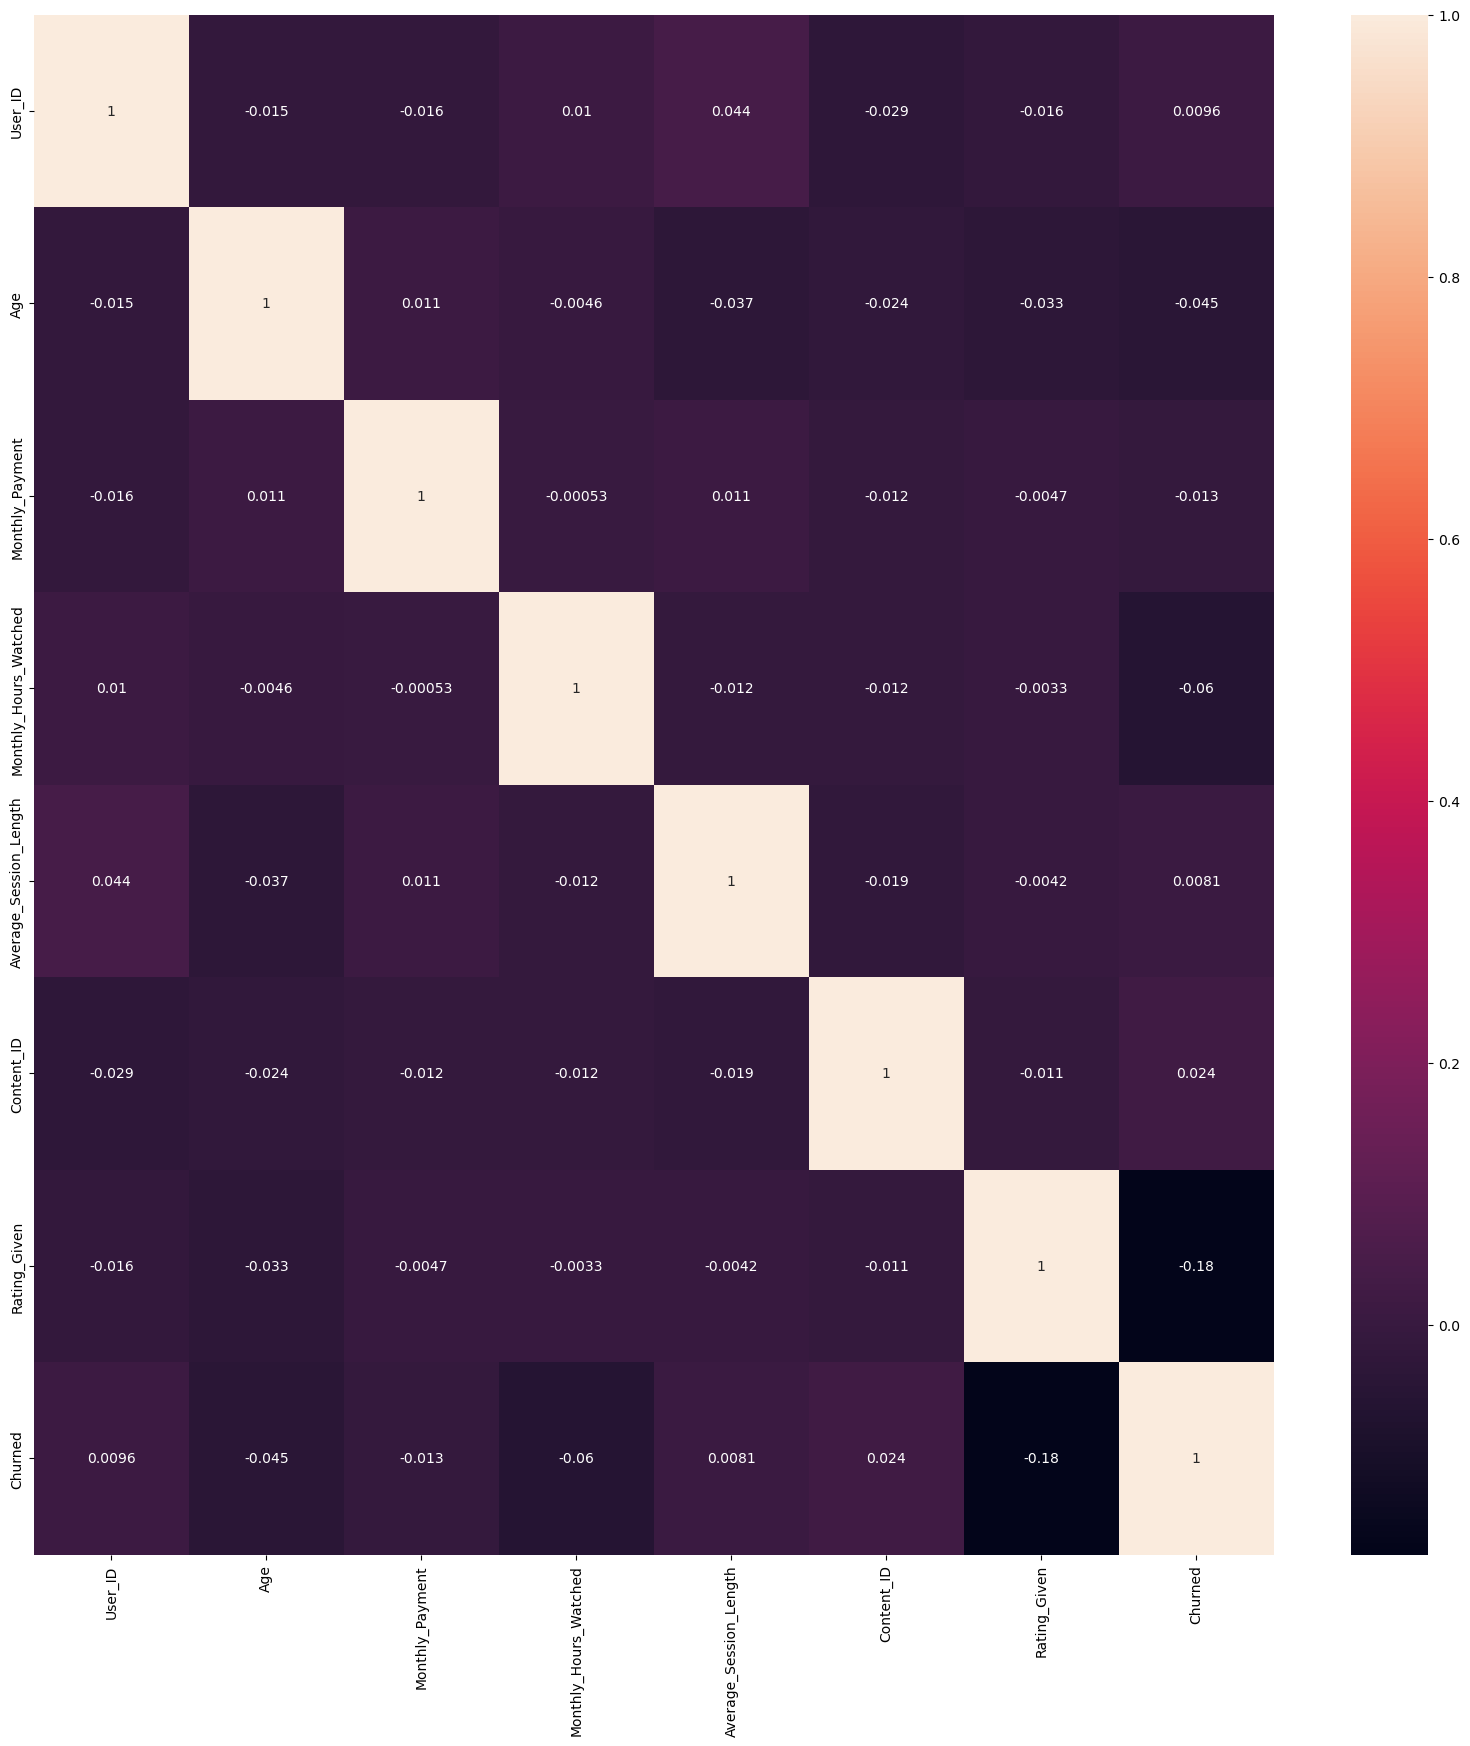

In [63]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize = (20,20))
sns.heatmap(df[numeric_columns].corr(), annot=True)

<Axes: xlabel='Churned', ylabel='Monthly_Hours_Watched'>

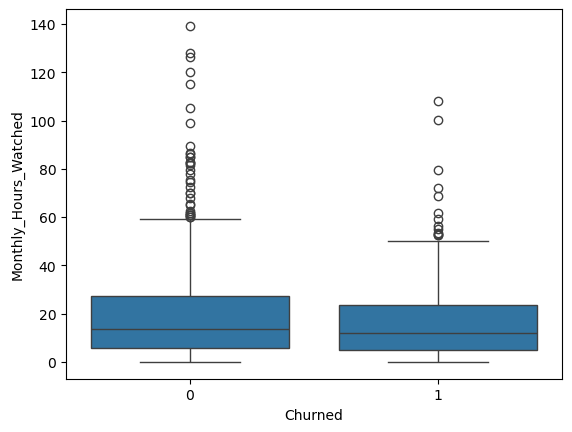

In [67]:
#integer data box plots
sns.boxplot(y=df['Monthly_Hours_Watched'], x=df['Churned'])

In [ ]:
#WATCHED A BIT LESS BUT NOT REALLY  

<Axes: xlabel='Churned', ylabel='Rating_Given'>

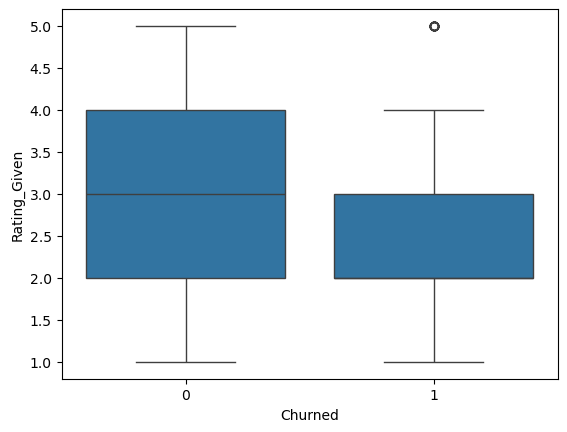

In [68]:
sns.boxplot(y=df['Rating_Given'], x=df['Churned'])

In [ ]:
#NON NUMERICAL

In [79]:
df.value_counts('Reason_for_Churn')

Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64

In [86]:
Priceincrease  = df[df['Reason_for_Churn'] == 0]
Foundbetterservice  = df[df['Reason_for_Churn'] == 1]
Personalreasons = df[df['Reason_for_Churn'] == 2]
Dissatisfiedwithcontent = df[df['Reason_for_Churn'] == 3]

In [81]:
df.Reason_for_Churn.value_counts()

Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64

In [89]:
df.groupby('Churned').Reason_for_Churn.value_counts()

Churned  Reason_for_Churn         
1        Price increase               68
         Found better service         64
         Personal reasons             62
         Dissatisfied with content    52
Name: count, dtype: int64

In [125]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,tenure
0,1,56,NaN,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,NaT
1,2,69,NaN,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,NaT
2,3,46,NaN,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,NaT
3,4,32,NaN,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,NaT
4,5,60,NaN,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,NaT
